# Sobre o algoritmo Rank to Page

O intuito desse jupyter notebook é desenvolver da melhor forma, o algoritmo de rank de grafo, tendo como base o algoritmo de Stanford, criado por Larry Page (PageRank), utilizado para ranquear as páginas mais relevantes da Web, feito pelo Google.

----------------
Bibliotecas

In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

-----------------------
Criando Grafo com arestas

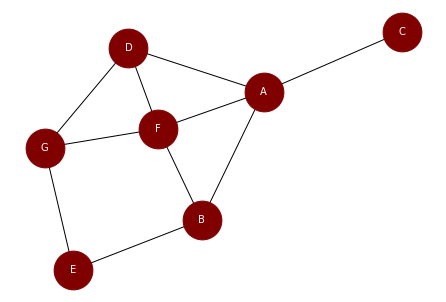

In [18]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), 
                  ('B', 'E'), ('B', 'F'), ('F', 'D'), 
                  ('D', 'G'), ('E', 'G'), ('F', 'G'),
                  ('G', 'E'), ('F', 'B'), ('F', 'A')])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='#800000',
        edge_color='black', font_size=10, font_color='white')

----------------
Criando matriz para melhorar a visualização e a utilização do grafo, dos nós e arestas.

[[0. 1. 1. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 0.]]


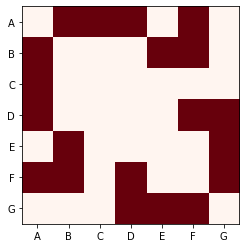

In [19]:
matriz = nx.to_numpy_matrix(G)
for i in range(len(matriz)):
    for j in range(len(matriz)):
        if G.has_edge(i, j):
            matriz[i][j] = 1

print(matriz)

colunas = ["A", "B", "C", "D", "E", "F", "G"]

plt.imshow(matriz, cmap='Reds', interpolation='nearest')
plt.xticks(range(len(colunas)), colunas)
plt.yticks(range(len(colunas)), colunas)
plt.show()


----------------
Calculo de Rank:

<div style="background-color: white; width: 300px">
    <img src="calc_to_rank.png">
</div>

In [25]:
def rank_to_graph(matriz, rank_nodes):
    if rank_nodes is None:
        rank_nodes = [1 / len(matriz) for i in range(len(matriz))]

    list_sum_arestas, list_r, list_rank = np.zeros(len(matriz)), np.zeros(len(matriz)), np.zeros(len(matriz))

    for i in range(len(matriz)):
        list_sum_arestas[i] = np.sum(matriz[i])

    for i in range(len(matriz)):
        list_r[i] = rank_nodes[i] / list_sum_arestas[i]
        
    for i in range(len(matriz)):
        for j in range(len(matriz)):
            print(i, j)


        # list_r_i_not = np.delete(list_r, i)
        # list_rank[i] = (1 - 0.85) / len(matriz) + 0.85 * np.sum(list_r_i_not)
    print(list_sum_arestas, list_r, list_rank)

    return list_rank

rank_to_graph(matriz, None)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6
[4. 3. 1. 3. 2. 4. 3.] [0.03571429 0.04761905 0.14285714 0.04761905 0.07142857 0.03571429
 0.04761905] [0. 0. 0. 0. 0. 0. 0.]


array([0., 0., 0., 0., 0., 0., 0.])

In [12]:
rank_nodes = None

while i < 15:
    rank_nodes = rank_to_graph(matriz, rank_nodes)
    i += 1
    print(rank_nodes)

[0.35535714 0.3452381  0.26428571 0.3452381  0.325      0.35535714
 0.3452381 ]
[0.7531622  0.73085813 0.60403274 0.73085813 0.6905506  0.7531622
 0.73085813]
[1.60961678 1.56258728 1.25623593 1.56258728 1.47617975 1.60961678
 1.56258728]
[3.38684826 3.28615876 2.66109129 3.28615876 3.10151543 3.38684826
 3.28615876]
[7.11444042 6.90306736 5.57221808 6.90306736 6.51600162 7.11444042
 6.90306736]
[14.90654048 14.46248999 11.6819737  14.46248999 13.64905838 14.90654048
 14.46248999]
[31.21271237 30.28264672 24.45067458 30.28264672 28.57950241 31.21271237
 30.28264672]
[65.32374158 63.37635972 51.17336957 63.37635972 59.81015443 65.32374158
 63.37635972]
[136.68930919 132.61396902 107.07324014 132.61396902 125.15128864
 136.68930919 132.61396902]
